In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv("Titanic-Dataset.csv",usecols=['Age','Fare','Survived'])
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_22276\3256908580.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

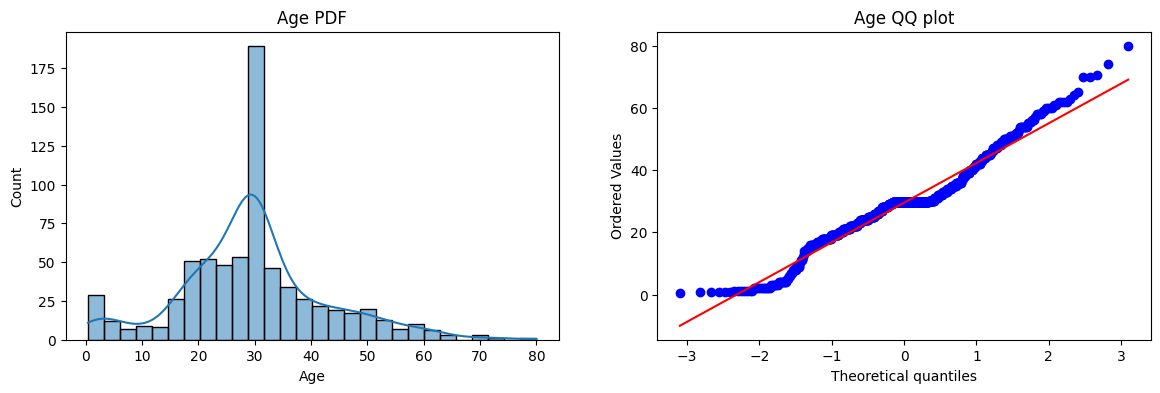

In [7]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x_train['Age'], kde=True) 
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ plot')

plt.show()

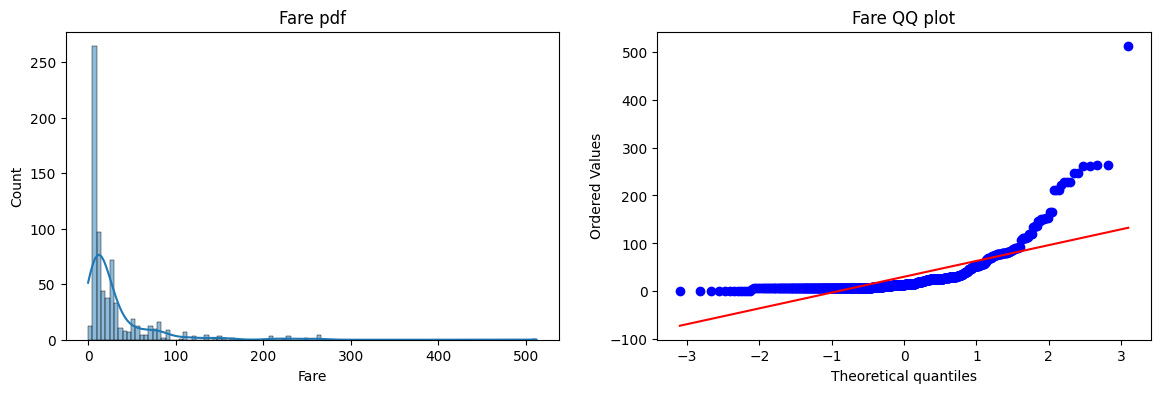

In [26]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x_train['Fare'],kde=True)
plt.title('Fare pdf')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist='norm',plot=plt)
plt.title('Fare QQ plot')

plt.show()

In [8]:
Clf = LogisticRegression()
Clf2 = DecisionTreeClassifier()

In [9]:
Clf.fit(x_train,y_train)
Clf2.fit(x_train,y_train)

_y_pred = Clf.predict(x_test)
_y_pred2 = Clf2.predict(x_test)

print('Accuracy LR',accuracy_score(y_test,_y_pred))
print('Accuracy DT',accuracy_score(y_test,_y_pred2))

Accuracy LR 0.6480446927374302
Accuracy DT 0.664804469273743


In [10]:
trf = FunctionTransformer(func=np.log1p)

In [13]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [14]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [17]:
clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred = clf.predict(x_test_transformed)
y_pred2 = clf2.predict(x_test_transformed)

print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred2))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6759776536312849


In [16]:
x_transformed = trf.fit_transform(x)

CLF = LogisticRegression()
CLF2 = DecisionTreeClassifier()

print('LR',np.mean(cross_val_score(CLF,x_transformed,y,scoring='accuracy',cv=10)))
print('DR',np.mean(cross_val_score(CLF2,x_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DR 0.651023720349563
